In [1]:
##Clear the environment
rm(list=ls())

##Turn off scientific notations for numbers
options(scipen = 999)  

##Set locale
Sys.setlocale("LC_ALL", "English") 

##Set seed for reproducibility
set.seed(2345)

# Turn off warnings
options(warn = -1)

getstats <- function(cm){
  # Sensititvity a.k.a TPR
  tpr <-cm[2,2]/(cm[2,2]+cm[2,1])
  fpr <-cm[1,2]/(cm[1,2]+cm[1,1])
  
  # Specificity a.k.a. TNR
  tnr <- cm[1,1]/(cm[1,1]+cm[1,2])
  fnr <- cm[2,1]/(cm[2,1]+cm[2,2])
  
  # Calculate accuracy
  acc <-(cm[2,2]+cm[1,1])/sum(cm)
  err <-(cm[1,2]+cm[2,1])/sum(cm)
  
  #Precision - Positive Predictive Value
  ppv <- cm[2,2]/(cm[2,2]+cm[1,2])
  
  # Negative Predictive Value
  npv <- cm[1,1]/(cm[1,1]+cm[2,1])
  
  rbind(TruePos_Sensitivity=tpr, FalsePos=fpr, TrueNeg_Specificty=tnr, FalseNeg=fnr, PositivePredictiveValue=ppv, NegativePredictiveValue=npv, Accuracy = acc, Error = err)
}

# clean the data names and data
# Use: df<-cleanit(df)
cleanit <-function(df){
  names(df) <-tolower(names(df))
  names(df) <- gsub("\\(","",names(df))
  names(df) <- gsub("\\)","",names(df))
  names(df) <- gsub("\\.","",names(df))
  names(df) <- gsub("_","",names(df))
  names(df) <- gsub("-","",names(df))
  names(df) <- gsub(",","",names(df))
  return(df)
}


[1] "LC_COLLATE=English_United States.1252;LC_CTYPE=English_United States.1252;LC_MONETARY=English_United States.1252;LC_NUMERIC=C;LC_TIME=English_United States.1252"

In [2]:
bull <- read.csv("D:/Data/BullRiders.csv")

In [3]:
str(bull)

'data.frame':	58 obs. of  44 variables:
 $ Rider             : Factor w/ 58 levels "Austin Meier",..: 26 39 23 30 41 58 21 50 43 24 ...
 $ Rank15            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Country           : Factor w/ 4 levels "AUS","BRA","CAN",..: 2 4 4 2 4 2 2 2 4 4 ...
 $ YearBorn          : int  1984 1991 1987 1994 1990 1979 1982 1987 1989 1986 ...
 $ Height            : int  66 67 70 68 73 72 70 67 68 70 ...
 $ Weight            : int  163 160 140 145 160 170 180 150 135 160 ...
 $ YearsPro          : int  3 4 10 2 6 9 16 7 9 10 ...
 $ Events14          : int  28 28 22 1 15 28 28 28 12 14 ...
 $ BuckOuts14        : int  93 86 63 1 41 81 90 92 30 37 ...
 $ Rides14           : int  41 33 25 0 17 29 41 50 8 16 ...
 $ CupPoints14       : num  9520 7494 4974 1672 3240 ...
 $ Rank14            : int  2 3 4 0 31 17 8 1 54 9 ...
 $ RidePer14         : num  0.441 0.384 0.397 0 0.415 ...
 $ RidesPer_45bull_14: num  0 0.2 0.5 0 0 ...
 $ Rides90pts_14     : int  5 2 4 0 0 1 2 1 0 2 ...
 $

In [9]:
head(bull,5)

,Rider,Rank15,Country,YearBorn,Height,Weight,YearsPro,Events14,BuckOuts14,Rides14,ellip.h,BuckOuts12,Rides12,CupPoints12,Rank12,RidePer12,Wins12,Top5_12,Top10_12,FinalPoints12,Earnings12
1,Joao Ricardo Vieira,1,BRA,1984,66,163,3,28,93,41,<8b>,0,0,0,0,0,0,0,0,0,0
2,Matt Triplett,2,USA,1991,67,160,4,28,86,33,<8b>,0,0,0,0,0,0,0,0,0,0
3,J.B. Mauney,3,USA,1987,70,140,10,22,63,25,<8b>,82,40,9273.25,8,0.49,3,8,13,287,313340.3
4,Kaique Pacheco,4,BRA,1994,68,145,2,1,1,0,<8b>,0,0,0,0,0,0,0,0,0,0
5,Nathan Schaper,5,USA,1990,73,160,6,15,41,17,<8b>,0,0,0,0,0,0,0,0,0,0


In [8]:
summary(bull)

            Rider        Rank15       Country     YearBorn        Height     
 Austin Meier  : 1   Min.   :  1.00   AUS: 5   Min.   :1979   Min.   :60.00  
 Ben Jones     : 1   1st Qu.: 15.25   BRA:13   1st Qu.:1985   1st Qu.:67.00  
 Billy Robinson: 1   Median : 32.50   CAN: 3   Median :1987   Median :68.00  
 Bonner Bolton : 1   Mean   : 51.31   USA:37   Mean   :1987   Mean   :68.64  
 Brady Sims    : 1   3rd Qu.: 61.00            3rd Qu.:1990   3rd Qu.:70.00  
 Brant Atwood  : 1   Max.   :279.00            Max.   :1994   Max.   :76.00  
 (Other)       :52                                                           
     Weight         YearsPro         Events14       BuckOuts14   
 Min.   :115.0   Min.   : 1.000   Min.   : 1.00   Min.   : 1.00  
 1st Qu.:145.0   1st Qu.: 5.000   1st Qu.: 4.00   1st Qu.: 9.25  
 Median :155.0   Median : 7.500   Median :17.50   Median :44.50  
 Mean   :153.8   Mean   : 7.948   Mean   :15.33   Mean   :43.03  
 3rd Qu.:162.8   3rd Qu.:10.000   3rd Qu.:25.0

In [10]:
#Subset for riders that participated in at least one event in 2013
new_bull <- bull[bull$Events13  > 0 ,]

[1]  0 11 19 25 50

[1] 18.73171

[1] 12.7319

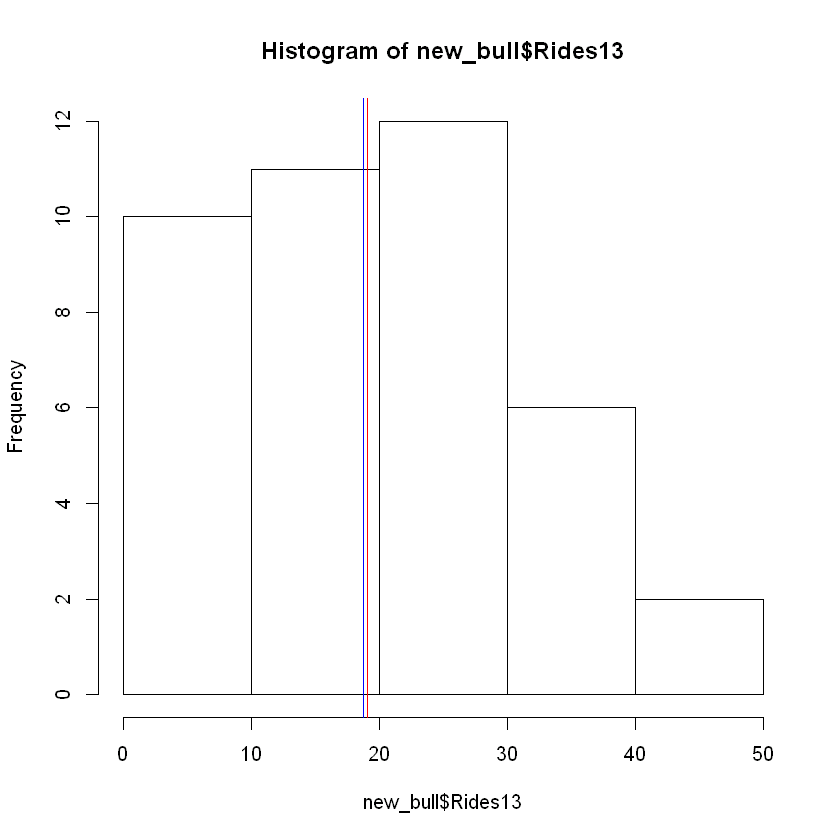

In [21]:
# Visualize and describe the first variable of interest
hist(new_bull$Rides13)
abline(v=median(new_bull$Rides13),col="red")
abline(v=mean(new_bull$Rides13),col="blue")
fivenum(new_bull$Rides13)
mean(new_bull$Rides13)
sd(new_bull$Rides13)

[1]  0  2  6  8 14

[1] 5.390244

[1] 4.036571

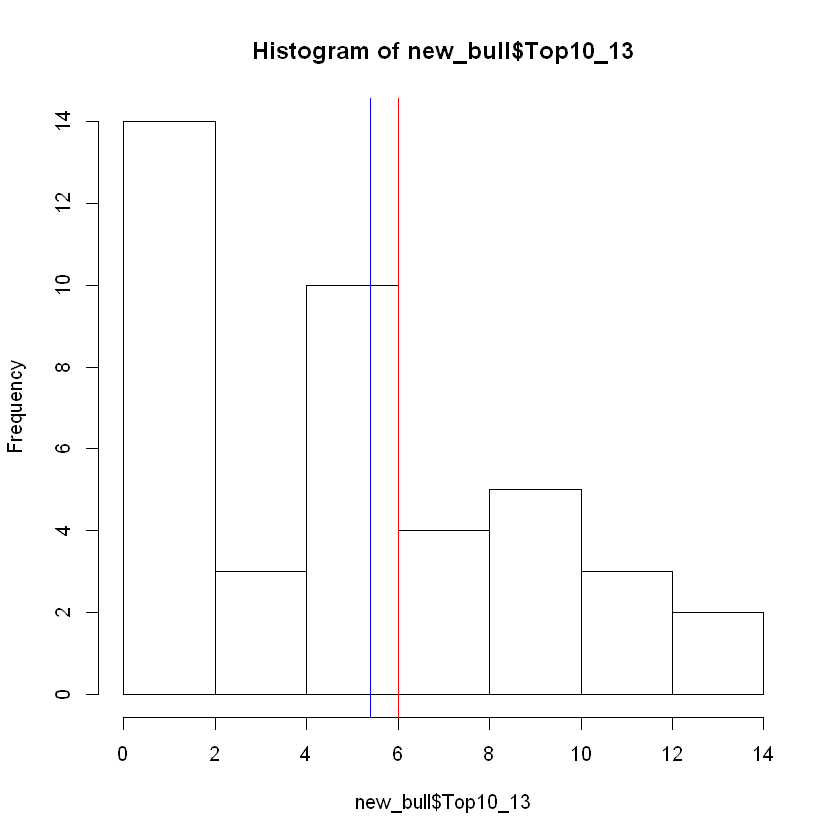

In [22]:
# Visualize and describe the second variable of interest
hist(new_bull$Top10_13)
abline(v=median(new_bull$Top10_13),col="red")
abline(v=mean(new_bull$Top10_13),col="blue")
fivenum(new_bull$Top10_13)
mean(new_bull$Top10_13)
sd(new_bull$Top10_13)

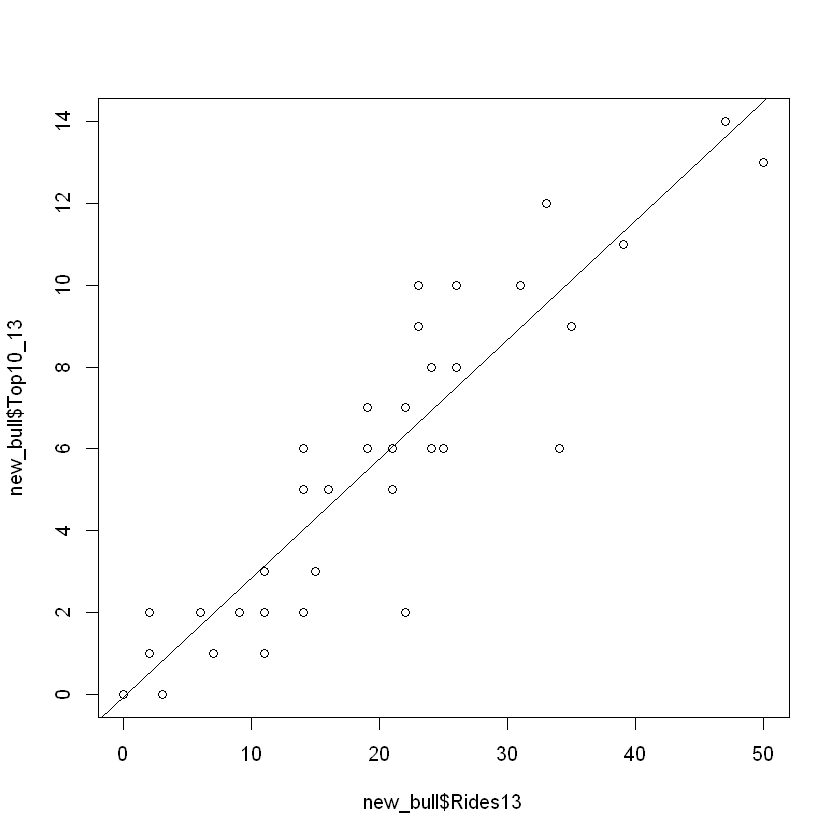

In [12]:
# Create a scatterplot
plot(new_bull$Rides13,new_bull$Top10_13)

# Add line of best fit
abline(lm(new_bull$Top10_13~new_bull$Rides13))

In [13]:
# Calculate the correlation coefficient
cor(new_bull$Rides13,new_bull$Top10_13)

# Create a correlation matrix 
vars <- c("Top10_13", "Rides13")
cor(new_bull[,vars])

[1] 0.916606

,Top10_13,Rides13
Top10_13,1.000000,0.916606
Rides13,0.916606,1.000000


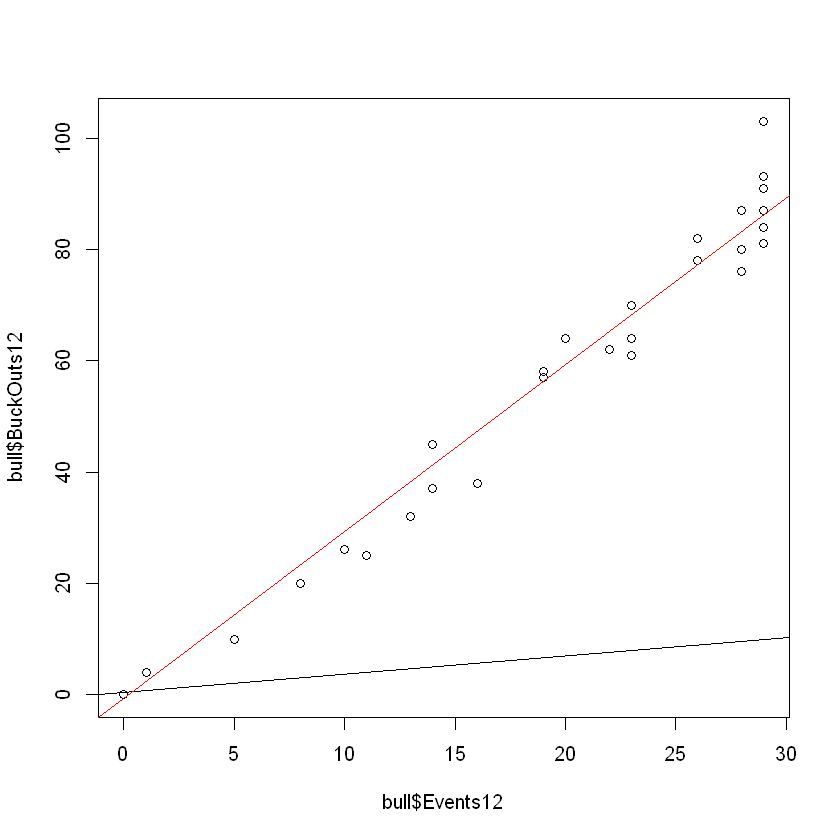

In [16]:
plot(bull$Events12, bull$BuckOuts12)
abline(lm(bull$Events12~bull$BuckOuts12))
abline(lm(bull$BuckOuts12~bull$Events12),col="red")

In [30]:
#identify a specific record
new_bull[which(new_bull$Top10_13==2 & new_bull$Rides13==22),20:30]

,Earnings14,Events13,BuckOuts13,Rides13,CupPoints13,Rank13,RidePer13,RidesPer_45bull_13,Rides90pts_13,Wins13,Top5_13
5,77426.3,24,66,22,4304.41,25,0.3333,0,0,0,2


## Problem Set

During a professional bull-riding event, riders usually attempt to ride a bull three or more times.  This means that they can record a "ride" (successfully staying on the bull) multiple times in the same event.

Subset the dataset for riders that had at least 1 ride in the 2014 season. Call this dataset new_bull.

Create a new variable or vector for the average number of rides per event for each bull rider in the new_bull dataset:

RidesPerEvent14 <- new_bull$Rides14/new_bull$Events14

Make a histogram of your "rides per event" variable and find the five-number summary for your "rides per event" variable.

In [53]:
#Subset for riders that participated in at least one event in 2013
new_bull <- bull[bull$Events14  > 0 ,]

In [54]:
new_bull$RidesPerEvent14<- new_bull$Rides14/new_bull$Events14

In [55]:
summary(new_bull$RidesPerEvent14)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.5000  0.9623  0.8407  1.1180  2.0000 

[1] 0.0000000 0.5000000 0.9622507 1.1333333 2.0000000

[1] 0.8406573

[1] 0.4737363

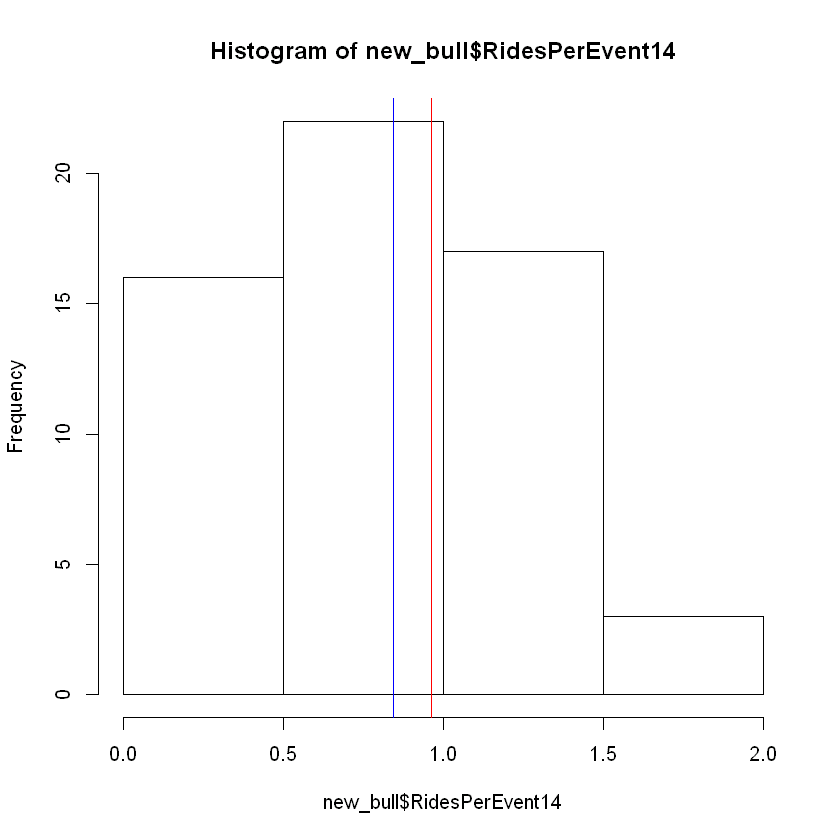

In [56]:
hist(new_bull$RidesPerEvent14)
abline(v=median(new_bull$RidesPerEvent14),col="red")
abline(v=mean(new_bull$RidesPerEvent14),col="blue")
fivenum(new_bull$RidesPerEvent14)
mean(new_bull$RidesPerEvent14)
sd(new_bull$RidesPerEvent14)

[1] -0.07323822

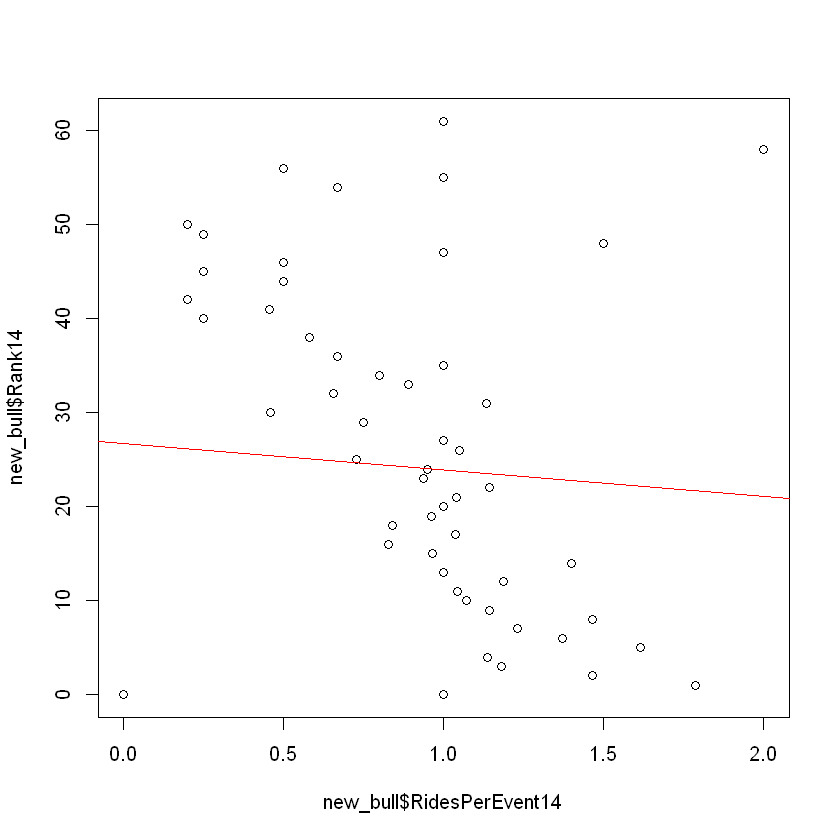

In [47]:

plot(new_bull$RidesPerEvent14, new_bull$Rank14)
abline(lm(new_bull$Rank14~new_bull$RidesPerEvent14),col="red")

## Primary Research Question

In 2012, which variable had the strongest linear relationship with Earnings:  Ride Percentage or Cup Points?

In [4]:
##Clear the environment
rm(list=ls())

##Turn off scientific notations for numbers
options(scipen = 999)  

##Set locale
Sys.setlocale("LC_ALL", "English") 

##Set seed for reproducibility
set.seed(2345)

# Turn off warnings
options(warn = -1)

getstats <- function(cm){
  # Sensititvity a.k.a TPR
  tpr <-cm[2,2]/(cm[2,2]+cm[2,1])
  fpr <-cm[1,2]/(cm[1,2]+cm[1,1])
  
  # Specificity a.k.a. TNR
  tnr <- cm[1,1]/(cm[1,1]+cm[1,2])
  fnr <- cm[2,1]/(cm[2,1]+cm[2,2])
  
  # Calculate accuracy
  acc <-(cm[2,2]+cm[1,1])/sum(cm)
  err <-(cm[1,2]+cm[2,1])/sum(cm)
  
  #Precision - Positive Predictive Value
  ppv <- cm[2,2]/(cm[2,2]+cm[1,2])
  
  # Negative Predictive Value
  npv <- cm[1,1]/(cm[1,1]+cm[2,1])
  
  rbind(TruePos_Sensitivity=tpr, FalsePos=fpr, TrueNeg_Specificty=tnr, FalseNeg=fnr, PositivePredictiveValue=ppv, NegativePredictiveValue=npv, Accuracy = acc, Error = err)
}

# clean the data names and data
# Use: df<-cleanit(df)
cleanit <-function(df){
  names(df) <-tolower(names(df))
  names(df) <- gsub("\\(","",names(df))
  names(df) <- gsub("\\)","",names(df))
  names(df) <- gsub("\\.","",names(df))
  names(df) <- gsub("_","",names(df))
  names(df) <- gsub("-","",names(df))
  names(df) <- gsub(",","",names(df))
  return(df)
}

[1] "LC_COLLATE=English_United States.1252;LC_CTYPE=English_United States.1252;LC_MONETARY=English_United States.1252;LC_NUMERIC=C;LC_TIME=English_United States.1252"

In [5]:
bull <- read.csv("D:/Data/BullRiders.csv")

### Analysis

Let’s break this analysis into the different steps that you will need to take to construct a complete answer.  Be sure to:

1. Create a dataset which contains riders that participated in at least one event in 2012. Call the dataset new_bull12.
2. Make a histogram to visualize the distribution of Earnings for 2012.
3. Generate the appropriate descriptive statistics for this distribution.
4. Make a correlation matrix for Earnings12, RidePer12 and CupPoints12.
5. Plot a scatterplot for Earnings12 with each variable of interest.  Put Earnings12 on the y-axis.  Check for outliers.
6. Determine which variable has the strongest linear relationship with Earnings12.

In [14]:
#Subset for riders that participated in at least one event in 2013
new_bull12 <- bull[bull$Events12  > 0 ,]
str(new_bull12)
#summary(new_bull12$Earnings12)

'data.frame':	29 obs. of  44 variables:
 $ Rider             : Factor w/ 58 levels "Austin Meier",..: 23 58 21 50 43 40 19 10 2 49 ...
 $ Rank15            : int  3 6 7 8 9 12 13 14 15 19 ...
 $ Country           : Factor w/ 4 levels "AUS","BRA","CAN",..: 4 2 2 2 4 4 2 4 1 4 ...
 $ YearBorn          : int  1987 1979 1982 1987 1989 1983 1982 1987 1979 1985 ...
 $ Height            : int  70 72 70 67 68 68 68 68 71 68 ...
 $ Weight            : int  140 170 180 150 135 140 175 162 163 165 ...
 $ YearsPro          : int  10 9 16 7 9 14 9 9 17 10 ...
 $ Events14          : int  22 28 28 28 12 26 26 28 11 1 ...
 $ BuckOuts14        : int  63 81 90 92 30 77 77 84 23 3 ...
 $ Rides14           : int  25 29 41 50 8 32 42 30 5 1 ...
 $ CupPoints14       : num  4974 5733 8501 9004 1228 ...
 $ Rank14            : int  4 17 8 1 54 7 5 10 41 61 ...
 $ RidePer14         : num  0.397 0.358 0.456 0.543 0.267 ...
 $ RidesPer_45bull_14: num  0.5 0 0 0.333 0 ...
 $ Rides90pts_14     : int  4 1 2 1 0 0 1 

[1]   21343.28   66814.33  147952.34  239935.66 1464475.61

[1] 201370.8

[1] 147952.3

[1] 267178.1

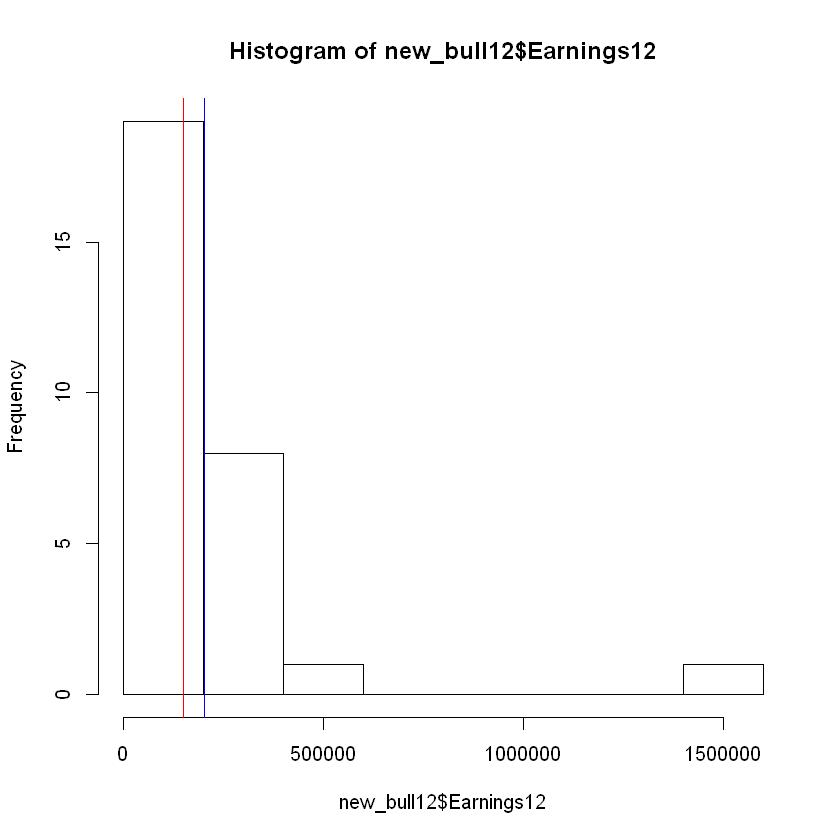

In [13]:
# Visualize and describe the first variable of interest
hist(new_bull12$Earnings12)
abline(v=median(new_bull12$Earnings12),col="red")
abline(v=mean(new_bull12$Earnings12),col="blue")
fivenum(new_bull12$Earnings12)
mean(new_bull12$Earnings12)
median(new_bull12$Earnings12)
sd(new_bull12$Earnings12)

### Make a Scatterplot of Earnings and Ride Percentage

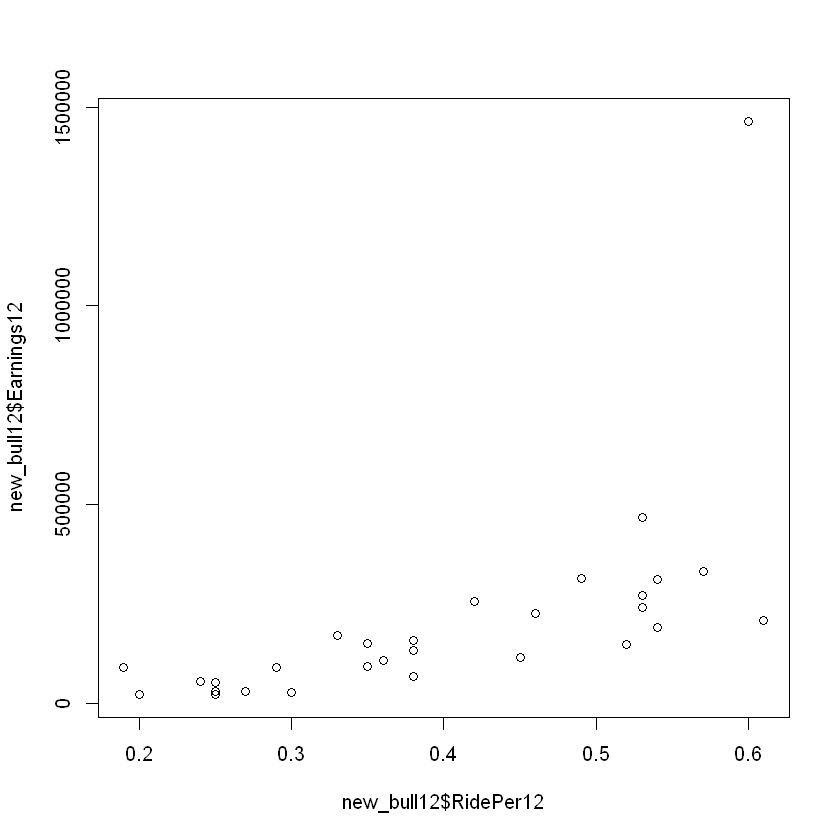

In [27]:
plot(new_bull12$RidePer12,new_bull12$Earnings12)

### Create a correlation matrix 

In [28]:
vars <- c("Earnings12", "RidePer12")
cor(new_bull12[,vars])

,Earnings12,RidePer12
Earnings12,1.000000,0.593411
RidePer12,0.593411,1.000000


## Create a Scatterplot of Earnings and Cup Points

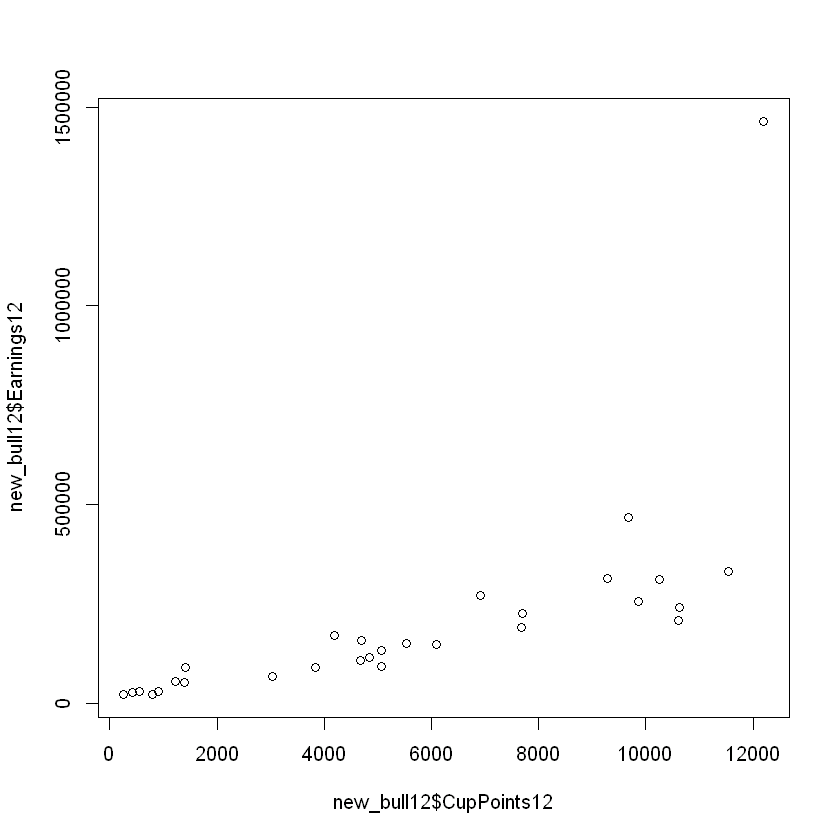

In [29]:
plot(new_bull12$CupPoints12,new_bull12$Earnings12)

### Create a Scatterplot of Earnings and Cup Points

In [31]:
vars <- c("Earnings12", "CupPoints12")
cor(new_bull12[,vars])

,Earnings12,CupPoints12
Earnings12,1.0000000,0.6569363
CupPoints12,0.6569363,1.0000000


## Outliers and Influential Points

### Identify
An outlier can have a significant impact on the correlation coefficient. Sometimes it is important to remove these points to examine the size of this impact. Run this code to identify the extreme data value in Earnings:

In [32]:
# identify specific case
which(new_bull12$Earnings12 == max(new_bull12$Earnings12))

[1] 4

In [33]:
new_bull12[4,]

,Rider,Rank15,Country,YearBorn,Height,Weight,YearsPro,Events14,BuckOuts14,Rides14,ellip.h,Rides12,CupPoints12,Rank12,RidePer12,Wins12,Top5_12,Top10_12,FinalPoints12,Earnings12,RidesPerEvent12
8,Silvano Alves,8,BRA,1987,67,150,7,28,92,50,<8b>,62,12201.75,1,0.6,2,8,18,1648,1464476,2.137931


### Remove

Let's remove this data point from the dataset to assess what kind of impact, if any, it had on our correlation analysis.  Then rerun the correlation matrix and the scatterplots to see the difference. Make sure to use the new dataframe (nooutlier) that you just created.

In [34]:
#Subset the data
nooutlier <- new_bull12[new_bull12$Earnings12 < 1000000 ,] 

In [35]:
vars <- c("Earnings12", "CupPoints12")
cor(nooutlier[,vars])

,Earnings12,CupPoints12
Earnings12,1.0000000,0.8929208
CupPoints12,0.8929208,1.0000000


In [36]:
vars <- c("Earnings12", "RidePer12")
cor(nooutlier[,vars])

,Earnings12,RidePer12
Earnings12,1.0000000,0.8035574
RidePer12,0.8035574,1.0000000
